# This notebook will produce the graphs from Section 4.2.1

In [3]:
import data
import pandas as pd

In [28]:
appliance = data.alldata.copy()
appliance.head()

,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker,Kitchen,LivingRoom,StoreRoom,Room1,Room2
2015-07-05 00:00:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0,0,0,0
2015-07-05 00:00:04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0
2015-07-05 00:00:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0
2015-07-05 00:00:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0
2015-07-05 00:00:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.35,0.0,0,1,0,0,0


In [124]:
import numpy as np
appliances = appliance.columns[:13]

appliance['Day'] = appliance.index.dayofyear
appliance['Hour'] = appliance.index.hour
appliance.head()

,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker,Kitchen,LivingRoom,StoreRoom,Room1,Room2,Day,Hour
2015-07-05 00:00:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0,0,0,0,186,0
2015-07-05 00:00:04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,186,0
2015-07-05 00:00:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,186,0
2015-07-05 00:00:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,186,0
2015-07-05 00:00:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.35,0.0,0,1,0,0,0,186,0


In [95]:
appliance_list_df = []
for i in range(len(appliances)):   
    a = appliance[[i,-1,-2]]
    a = a.resample('1h').mean()
    a = a.pivot(index='Day', columns='Hour')
    a = a.replace(np.inf,np.nan)
    a = a.fillna(0)
    appliance_list_df.append(a)

In [128]:
from sklearn.cluster import KMeans

appliance_inertias = []
for i in range(len(appliances)):
    two = KMeans(n_clusters=2,random_state=0).fit(appliance_list_df[i]).inertia_
    three = KMeans(n_clusters=3,random_state=0).fit(appliance_list_df[i]).inertia_
    a = [two, three]
    appliance_inertias.append(a)

appliance_inertias

[[18069154.225988828, 16343172.183533289],
 [318060.9205171669, 262763.86711074953],
 [40481.445594134944, 30722.611925180332],
 [523328.66193187109, 458394.6321231788],
 [286718.04235661251, 251395.21665403675],
 [233973.67881616188, 201180.82527246955],
 [1382719.1079964247, 1025916.1406153487],
 [11426.142971395189, 7342.3581011997558],
 [2656187.8623154936, 2241000.7953750566],
 [882419.03521652985, 725284.68363776174],
 [119302.76026133695, 77990.666892767578],
 [62029.573492141157, 22558.859915633926],
 [6135351.8925776053, 5373411.8866462242]]

In [129]:
#this will tell us if we should either go with two or three clusters for each appliance power consumption
clusters_for_min_inertia = []
for i in range(len(appliance_inertias)):
    clusters_for_min_inertia.append(appliance_inertias[i].index(min(appliance_inertias[i]))+2)
clusters_for_min_inertia 

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

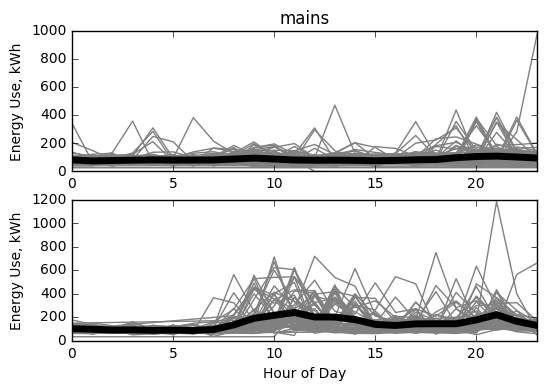

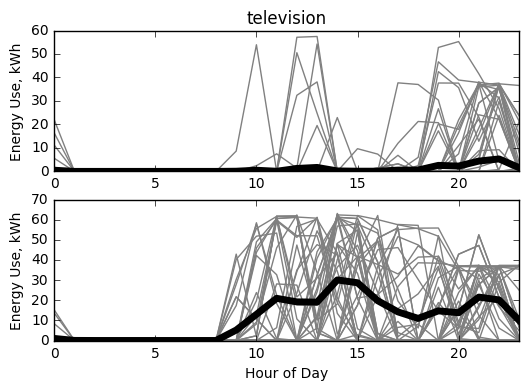

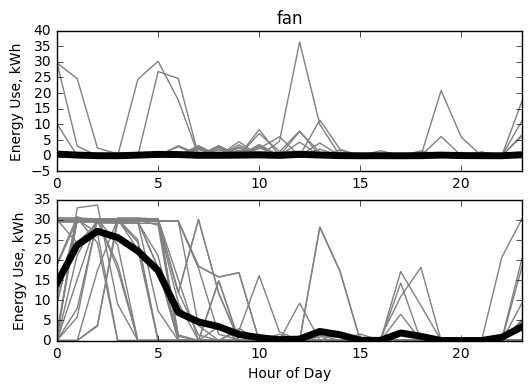

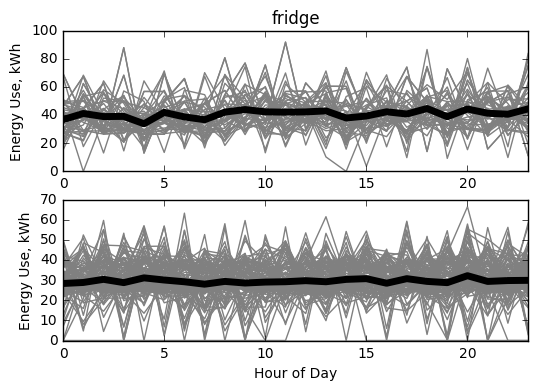

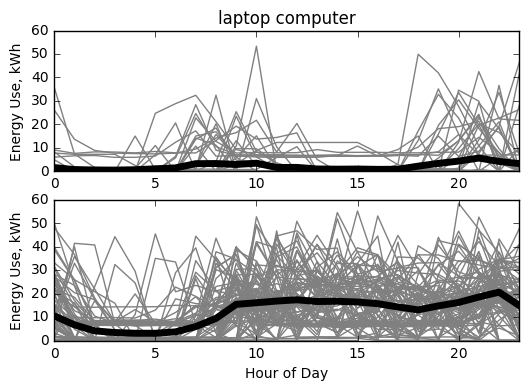

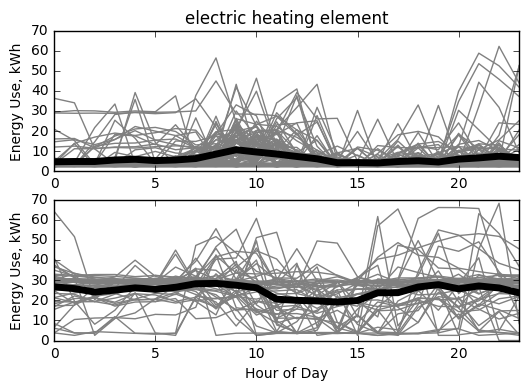

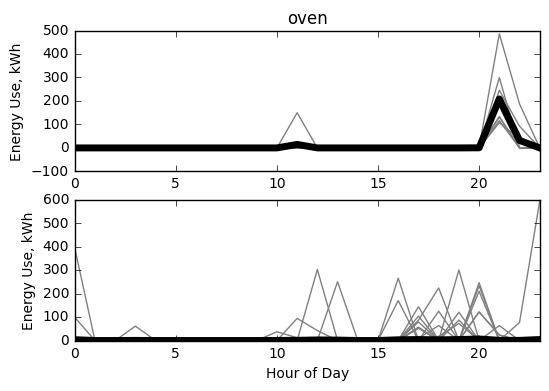

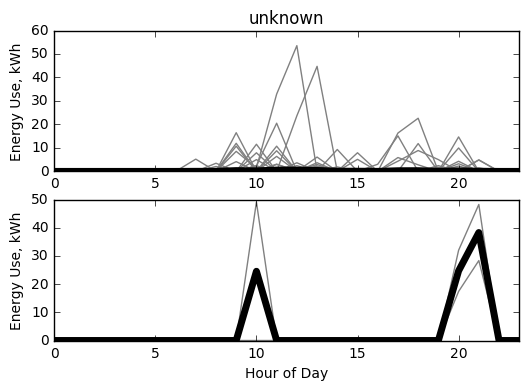

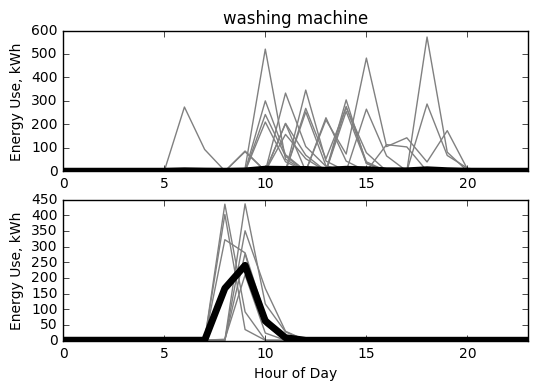

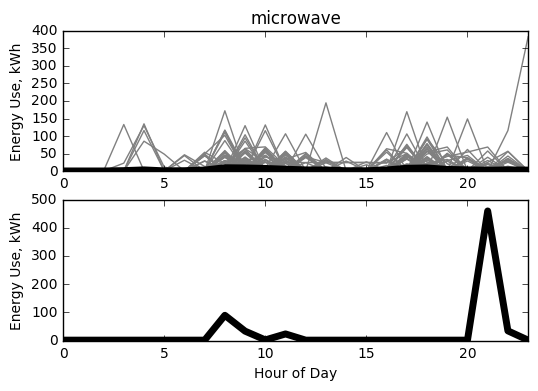

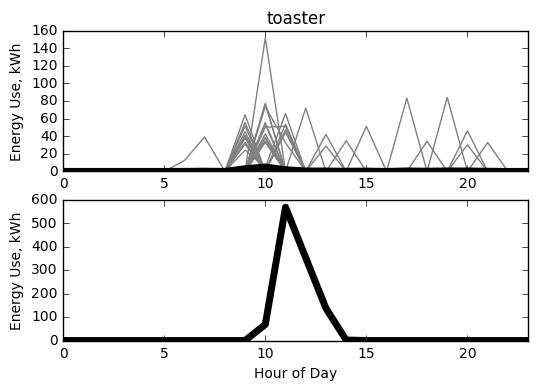

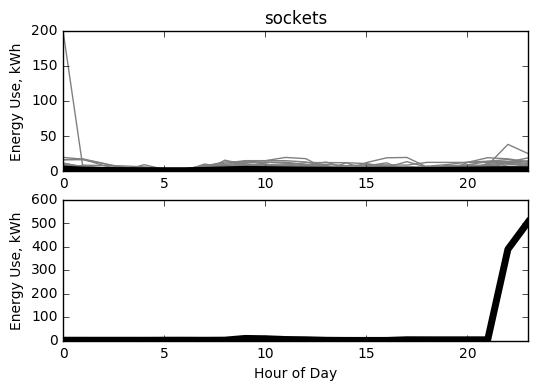

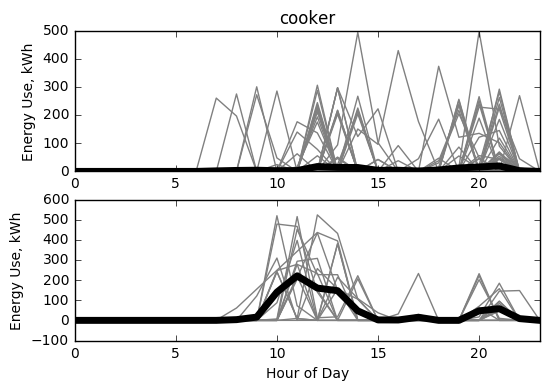

In [161]:
import matplotlib.pyplot as plt

for l in range(len(appliances)):

    three_kmeans = KMeans(n_clusters=2,random_state=0).fit(appliance_list_df[l])

    hours = np.linspace(0,23,24)
    cluster_one = appliance_list_df[l].ix[three_kmeans.labels_ == 0]
    cluster_two = appliance_list_df[l].ix[three_kmeans.labels_ == 1]
    
    plt.figure(l)
    plt.figure(figsize=(6,4))

    plt.subplot(2,1,1)
    cluster_one = cluster_one.as_matrix(columns=None)
    for x in range(len(cluster_one)):
        plt.plot(hours,cluster_one[x],color='gray')
    plt.plot(hours,three_kmeans.cluster_centers_[0],linewidth=5,color='k')
    plt.title(appliances[l])
    plt.xlim(0,23)
    plt.ylabel('Energy Use, kWh')

    plt.subplot(2,1,2)
    cluster_two = cluster_two.as_matrix(columns=None)
    for x in range(len(cluster_two)):
        plt.plot(hours,cluster_two[x],color='gray')
    plt.plot(hours,three_kmeans.cluster_centers_[1],linewidth=5,color='k',)
    plt.xlim(0,23)
    plt.ylabel('Energy Use, kWh')
    plt.xlabel('Hour of Day')
